In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score
from sklearn import preprocessing
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [2]:
ft=pd.read_csv('Final_Table_mapping.csv')

In [3]:
ft

,user_id,plan,age,monetary_value,frequency_value,recency_value
0,0,0,28,865.635000,65.000000,3
1,1,0,35,809.721250,8.312500,3
2,2,0,24,453.983333,44.666667,3
3,3,0,39,466.619333,9.333333,3
4,4,0,28,61.339375,3.125000,2
...,...,...,...,...,...,...
14816,15539,0,23,474.994444,10.111111,3
14817,15540,0,35,6.935714,0.714286,1
14818,15541,0,42,1772.166000,106.200000,3
14819,15542,1,43,25.545000,1.437500,3


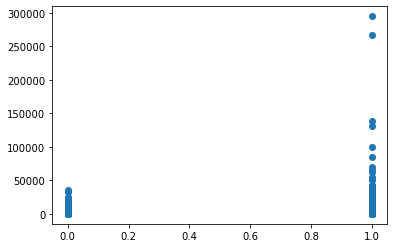

In [4]:
plt.scatter(ft['plan'],ft["monetary_value"])

In [5]:
ft[ft["monetary_value"]>100000]

,user_id,plan,age,monetary_value,frequency_value,recency_value
619,663,1,51,267223.580833,31.250000,3
879,936,1,41,294784.958571,46.428571,3
2666,2826,1,53,138445.874286,8.000000,3
14278,14971,1,50,131418.983077,2.461538,3


In [6]:
ft["monetary_value"].max()

294784.9585714286

In [7]:
ft=ft.drop([619,879,2666,14278 ])

In [8]:
ft

,user_id,plan,age,monetary_value,frequency_value,recency_value
0,0,0,28,865.635000,65.000000,3
1,1,0,35,809.721250,8.312500,3
2,2,0,24,453.983333,44.666667,3
3,3,0,39,466.619333,9.333333,3
4,4,0,28,61.339375,3.125000,2
...,...,...,...,...,...,...
14816,15539,0,23,474.994444,10.111111,3
14817,15540,0,35,6.935714,0.714286,1
14818,15541,0,42,1772.166000,106.200000,3
14819,15542,1,43,25.545000,1.437500,3


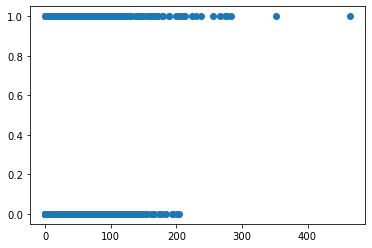

In [9]:
plt.scatter(ft['frequency_value'],ft['plan'])

In [10]:
ft[ft['frequency_value']>230]

,user_id,plan,age,monetary_value,frequency_value,recency_value
243,254,1,33,6479.290000,351.666667,3
1921,2034,1,34,54959.946667,464.333333,3
1979,2097,1,34,16665.004444,283.555556,3
2033,2153,1,31,3817.216667,274.555556,3
4274,4518,1,44,3115.220000,238.000000,3
9397,9879,1,31,3644.698750,277.250000,3
10219,10740,1,60,1443.142500,267.000000,3
10350,10883,1,32,5411.651538,230.384615,3
10899,11456,1,28,3270.630000,255.500000,3


In [11]:
ft=ft.drop([243,1921,1979,2033,4274,9397,10219,10350,10899 ])

In [12]:
ft

,user_id,plan,age,monetary_value,frequency_value,recency_value
0,0,0,28,865.635000,65.000000,3
1,1,0,35,809.721250,8.312500,3
2,2,0,24,453.983333,44.666667,3
3,3,0,39,466.619333,9.333333,3
4,4,0,28,61.339375,3.125000,2
...,...,...,...,...,...,...
14816,15539,0,23,474.994444,10.111111,3
14817,15540,0,35,6.935714,0.714286,1
14818,15541,0,42,1772.166000,106.200000,3
14819,15542,1,43,25.545000,1.437500,3


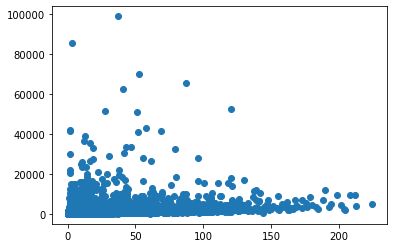

In [13]:
plt.scatter(ft['frequency_value'],ft['monetary_value'])

In [14]:
ft['age'].value_counts()


28    717
31    664
30    653
27    650
29    646
     ... 
80      2
82      1
90      1
85      1
91      1
Name: age, Length: 69, dtype: int64

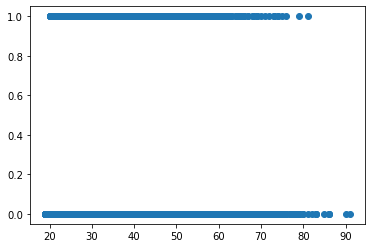

In [15]:
plt.scatter(ft['age'],ft['plan'])

In [16]:
ft[ft['frequency_value']<60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14191 entries, 1 to 14820
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          14191 non-null  int64  
 1   plan             14191 non-null  int64  
 2   age              14191 non-null  int64  
 3   monetary_value   14191 non-null  float64
 4   frequency_value  14191 non-null  float64
 5   recency_value    14191 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 776.1 KB


In [17]:
ft[ft['frequency_value']>200]

,user_id,plan,age,monetary_value,frequency_value,recency_value
2254,2386,1,23,5144.794286,224.142857,3
3593,3798,1,30,2442.738182,203.545455,3
7022,7397,0,39,4387.026923,201.153846,3
9457,9942,1,26,9474.971667,211.500000,3
10017,10530,0,21,1783.294000,204.000000,3
12880,13522,1,27,4020.235000,212.666667,3
14292,14986,1,39,9457.863333,208.166667,3


In [18]:
ft=ft.drop([2254,3593,7022,9457,10017,12880,14292])

In [19]:
ft1=ft.copy()

In [20]:
x=ft['age']
y=[]
for i in x:
    if i<=29:
        y.append(1)
    elif i<=49:
        y.append(2)
    else:
        y.append(3)
ft['age']=y

In [21]:
z=ft['monetary_value']
e=[]
for i in z:
    if i<=100.:
        e.append(1)
    elif i<=500.:
        e.append(2)
    elif i<=1000.:
        e.append(3)
    else:
        e.append(4)
ft['monetary_value']=e

In [22]:
a=ft['frequency_value']
b=[]
for i in a:
    if i<=3:
        b.append(1)
    elif i<=11:
        b.append(2)
    elif i<=22:
        b.append(3)
    else:
        b.append(4)
ft['frequency_value']=b

In [23]:
ft

,user_id,plan,age,monetary_value,frequency_value,recency_value
0,0,0,1,3,4,3
1,1,0,2,3,2,3
2,2,0,1,2,4,3
3,3,0,2,2,2,3
4,4,0,1,1,2,2
...,...,...,...,...,...,...
14816,15539,0,1,2,2,3
14817,15540,0,2,1,1,1
14818,15541,0,2,4,4,3
14819,15542,1,2,1,1,3


In [24]:
ft.to_csv('Final_Table_Mapping_For_All',index=False)

In [25]:
x=ft.iloc[:,3:]
x=preprocessing.scale(x)


In [26]:
km=KMeans(4)
km.fit(x)

KMeans(n_clusters=4)

In [27]:
clusters=km.fit_predict(x)
clusters

array([2, 0, 0, ..., 2, 3, 0])

In [28]:
km.inertia_
wcss=[]
for i in range(2,6):
    km=KMeans(i)
    km.fit(x)
    wcss_iter=km.inertia_
    wcss.append(wcss_iter)


In [29]:
wcss

[22245.15050245115, 12199.829957257209, 9593.404541138709, 7490.664605912716]

Text(0.5, 1.0, 'Number of Clusters')

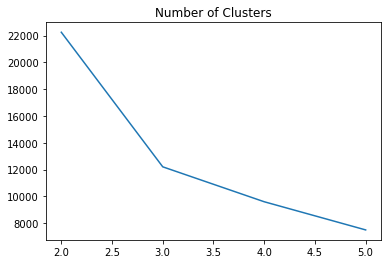

In [30]:
number_clusters=range(2,6)
plt.plot(number_clusters,wcss)
plt.title('Number of Clusters')

In [31]:
ft_with_clusters=ft.copy()

In [32]:
ft_with_clusters['group']=clusters


In [33]:
a=ft_with_clusters[ft_with_clusters['group']==0]
a


,user_id,plan,age,monetary_value,frequency_value,recency_value,group
1,1,0,2,3,2,3,0
2,2,0,1,2,4,3,0
3,3,0,2,2,2,3,0
6,6,0,1,2,2,3,0
10,10,0,1,2,2,3,0
...,...,...,...,...,...,...,...
14798,15521,0,1,2,3,3,0
14805,15528,0,2,3,2,3,0
14809,15532,0,2,3,2,3,0
14816,15539,0,1,2,2,3,0


In [34]:
b=ft_with_clusters[ft_with_clusters['group']==1]
b

,user_id,plan,age,monetary_value,frequency_value,recency_value,group
4,4,0,1,1,2,2,1
5,5,0,2,1,1,1,1
9,9,0,2,2,2,2,1
13,13,0,2,1,1,2,1
14,14,0,3,1,1,2,1
...,...,...,...,...,...,...,...
14807,15530,0,2,1,1,2,1
14811,15534,0,2,1,1,1,1
14814,15537,0,3,1,1,1,1
14815,15538,0,1,1,1,1,1


In [35]:
c=ft_with_clusters[ft_with_clusters['group']==2]
c

,user_id,plan,age,monetary_value,frequency_value,recency_value,group
0,0,0,1,3,4,3,2
7,7,0,1,4,4,3,2
8,8,0,1,3,4,3,2
16,17,0,1,4,4,3,2
18,19,0,1,3,4,3,2
...,...,...,...,...,...,...,...
14800,15523,0,1,3,3,3,2
14802,15525,1,1,4,4,3,2
14806,15529,0,2,4,2,3,2
14810,15533,0,1,3,4,3,2


In [36]:
d=ft_with_clusters[ft_with_clusters['group']==3]
d

,user_id,plan,age,monetary_value,frequency_value,recency_value,group
28,29,0,2,2,1,3,3
33,34,0,2,1,1,3,3
42,43,0,1,1,2,3,3
46,47,0,2,1,1,3,3
51,52,0,2,1,2,3,3
...,...,...,...,...,...,...,...
14799,15522,0,2,1,1,3,3
14808,15531,0,2,1,1,3,3
14812,15535,0,2,1,1,3,3
14813,15536,0,2,1,2,3,3


In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


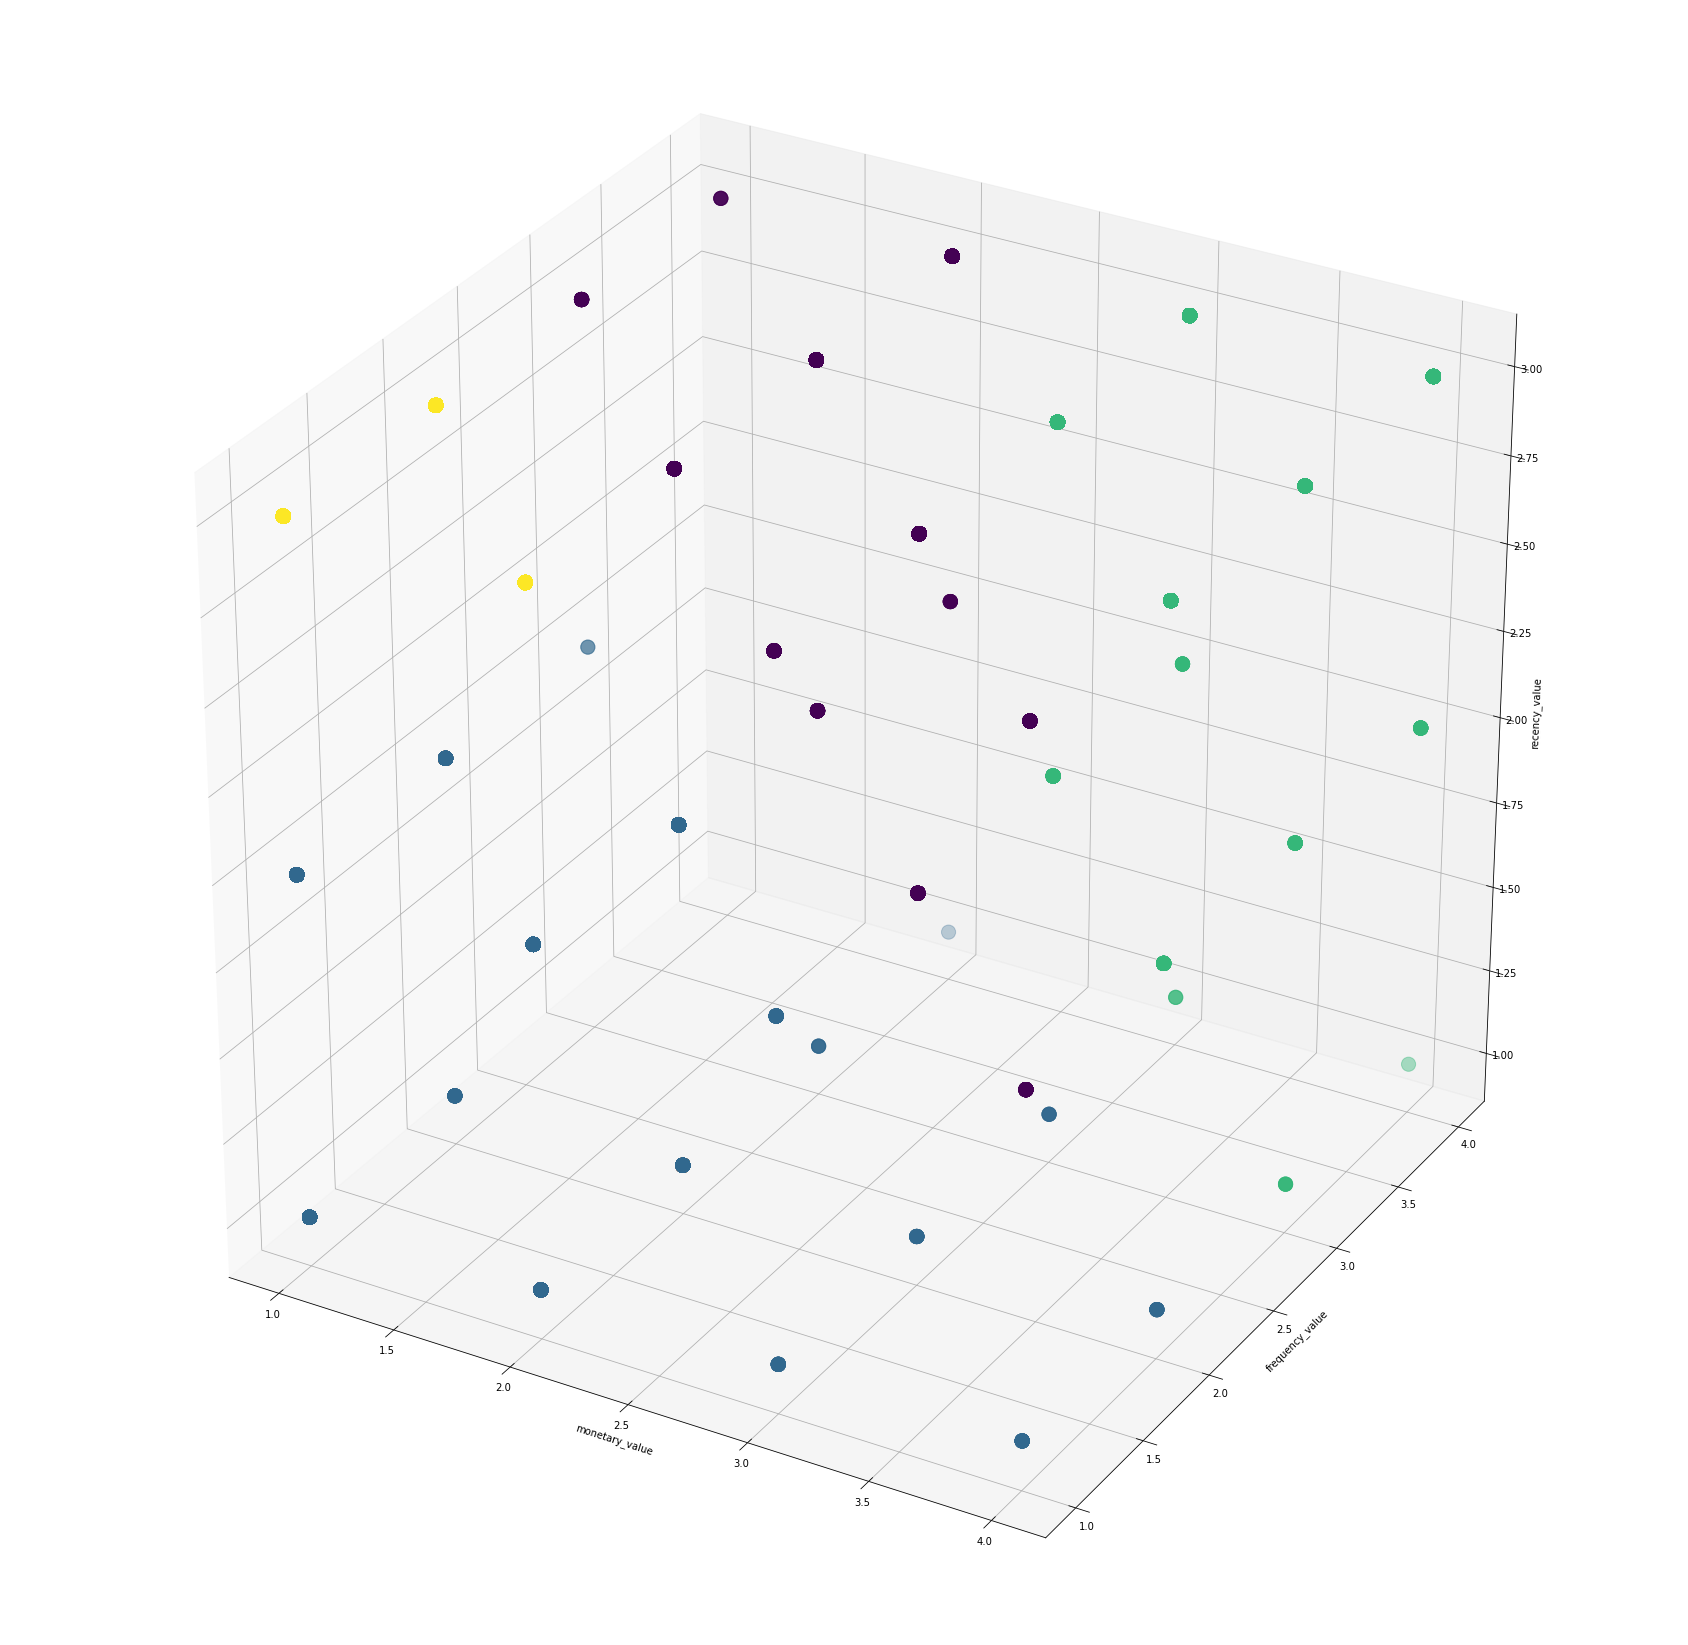

In [38]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
x =ft_with_clusters['monetary_value']
y =ft_with_clusters['frequency_value']
z =ft_with_clusters['recency_value']
ax.scatter(x, y, z, c=ft_with_clusters['group'], marker='o',s=200)
ax.set_xlabel('monetary_value')
ax.set_ylabel('frequency_value')
ax.set_zlabel('recency_value')
plt.show()

In [39]:
ft_with_rfm=ft_with_clusters.copy()
ft_with_rfm['score']=ft_with_clusters['recency_value']*3+ft_with_clusters['frequency_value']*2+ft_with_clusters['monetary_value']

In [40]:
ft_with_rfm.to_csv('FINAL_F-I-N-A-L table with RFM SCORE.csv', index=False)

In [41]:
ft_with_rfm

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score
0,0,0,1,3,4,3,2,20
1,1,0,2,3,2,3,0,16
2,2,0,1,2,4,3,0,19
3,3,0,2,2,2,3,0,15
4,4,0,1,1,2,2,1,11
...,...,...,...,...,...,...,...,...
14816,15539,0,1,2,2,3,0,15
14817,15540,0,2,1,1,1,1,6
14818,15541,0,2,4,4,3,2,21
14819,15542,1,2,1,1,3,3,12


In [42]:
ft_with_rfm[ft_with_rfm['group']==0].describe()

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.0,4178.000000
mean,7836.340833,0.058162,1.799186,2.211584,2.325275,2.959550,0.0,15.740785
std,4516.748977,0.234077,0.645887,0.483622,0.674256,0.197036,0.0,1.313843
min,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.0,12.000000
25%,3897.250000,0.000000,1.000000,2.000000,2.000000,3.000000,0.0,15.000000
50%,7906.500000,0.000000,2.000000,2.000000,2.000000,3.000000,0.0,15.000000
75%,11735.750000,0.000000,2.000000,2.000000,3.000000,3.000000,0.0,17.000000
max,15543.000000,1.000000,3.000000,4.000000,4.000000,3.000000,0.0,19.000000


In [43]:
ft_with_rfm[ft_with_rfm['group']==1].describe()

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score
count,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.000000,3966.0,3966.000000
mean,7837.932678,0.004539,1.860565,1.290217,1.176752,1.600857,1.0,8.446293
std,4474.742767,0.067224,0.672255,0.528378,0.392585,0.489784,0.0,1.961680
min,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,6.000000
25%,4020.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,6.000000
50%,7869.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.0,9.000000
75%,11659.250000,0.000000,2.000000,2.000000,1.000000,2.000000,1.0,9.000000
max,15540.000000,1.000000,3.000000,4.000000,4.000000,2.000000,1.0,13.000000


In [44]:
ft_with_rfm[ft_with_rfm['group']==2].describe()

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.0,3976.000000
mean,7664.030433,0.192907,1.770875,3.662475,3.452213,2.961016,2.0,19.449950
std,4485.436031,0.394631,0.649774,0.472925,0.685321,0.206167,0.0,1.629449
min,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,2.0,13.000000
25%,3727.500000,0.000000,1.000000,3.000000,3.000000,3.000000,2.0,18.000000
50%,7587.500000,0.000000,2.000000,4.000000,4.000000,3.000000,2.0,20.000000
75%,11622.750000,0.000000,2.000000,4.000000,4.000000,3.000000,2.0,21.000000
max,15541.000000,1.000000,3.000000,4.000000,4.000000,3.000000,2.0,21.000000


In [45]:
ft_with_rfm[ft_with_rfm['group']==3].describe()

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.0,2681.0,2681.000000
mean,7866.060052,0.038419,1.854905,1.199179,1.217829,3.0,3.0,12.634838
std,4433.995014,0.192240,0.647774,0.399458,0.412848,0.0,0.0,0.817145
min,29.000000,0.000000,1.000000,1.000000,1.000000,3.0,3.0,12.000000
25%,4132.000000,0.000000,1.000000,1.000000,1.000000,3.0,3.0,12.000000
50%,7809.000000,0.000000,2.000000,1.000000,1.000000,3.0,3.0,12.000000
75%,11664.000000,0.000000,2.000000,1.000000,1.000000,3.0,3.0,13.000000
max,15542.000000,1.000000,3.000000,2.000000,2.000000,3.0,3.0,14.000000


In [46]:
ft_with_rfm[ft_with_rfm['group']==1][ft_with_rfm[ft_with_rfm['group']==1]['score']>=12]

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score
9,9,0,2,2,2,2,1,12
88,91,0,2,2,2,2,1,12
124,129,0,1,2,2,2,1,12
131,136,0,2,2,2,2,1,12
145,151,0,3,2,2,2,1,12
...,...,...,...,...,...,...,...,...
14716,15437,0,1,2,2,2,1,12
14728,15449,0,2,2,2,2,1,12
14754,15476,0,1,2,2,2,1,12
14775,15498,0,2,2,2,2,1,12


In [47]:
z=ft_with_rfm['score']
f=[]
for i in z:
    if i<12:
        f.append(1)
    else:
        f.append(0)
ft_with_rfm['churned']=f

In [48]:
ft_with_rfm

,user_id,plan,age,monetary_value,frequency_value,recency_value,group,score,churned
0,0,0,1,3,4,3,2,20,0
1,1,0,2,3,2,3,0,16,0
2,2,0,1,2,4,3,0,19,0
3,3,0,2,2,2,3,0,15,0
4,4,0,1,1,2,2,1,11,1
...,...,...,...,...,...,...,...,...,...
14816,15539,0,1,2,2,3,0,15,0
14817,15540,0,2,1,1,1,1,6,1
14818,15541,0,2,4,4,3,2,21,0
14819,15542,1,2,1,1,3,3,12,0


In [49]:
ft_with_rfm.to_csv('FINAL_F-I-N-A-L table with RFM SCORE and Churner(1=churned).csv', index=False)